Zadanie: przy użyciu danych stwórz model regresji (może być więcej niż jeden) przewidujący cenę domów (price).

Elementy, które chcę żebyście zawarli w Waszych pracach:
1. EDA
2. Trenowanie modelu
3. Testowanie modelu
4. Predykcja
5. Metryka dopasowania modelu

Dodajcie również pare zdań komentarza do każdego z punktów np. dlaczego korzystacie z tych zmiennych a nie innych

załadowanie bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

załadowanie pliku House_Price.csv

In [2]:
uploaded = files.upload()
data_domy = pd.read_csv('House_Price.csv')

Saving House_Price.csv to House_Price.csv


1. EDA

In [3]:
data_domy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data_domy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data_domy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


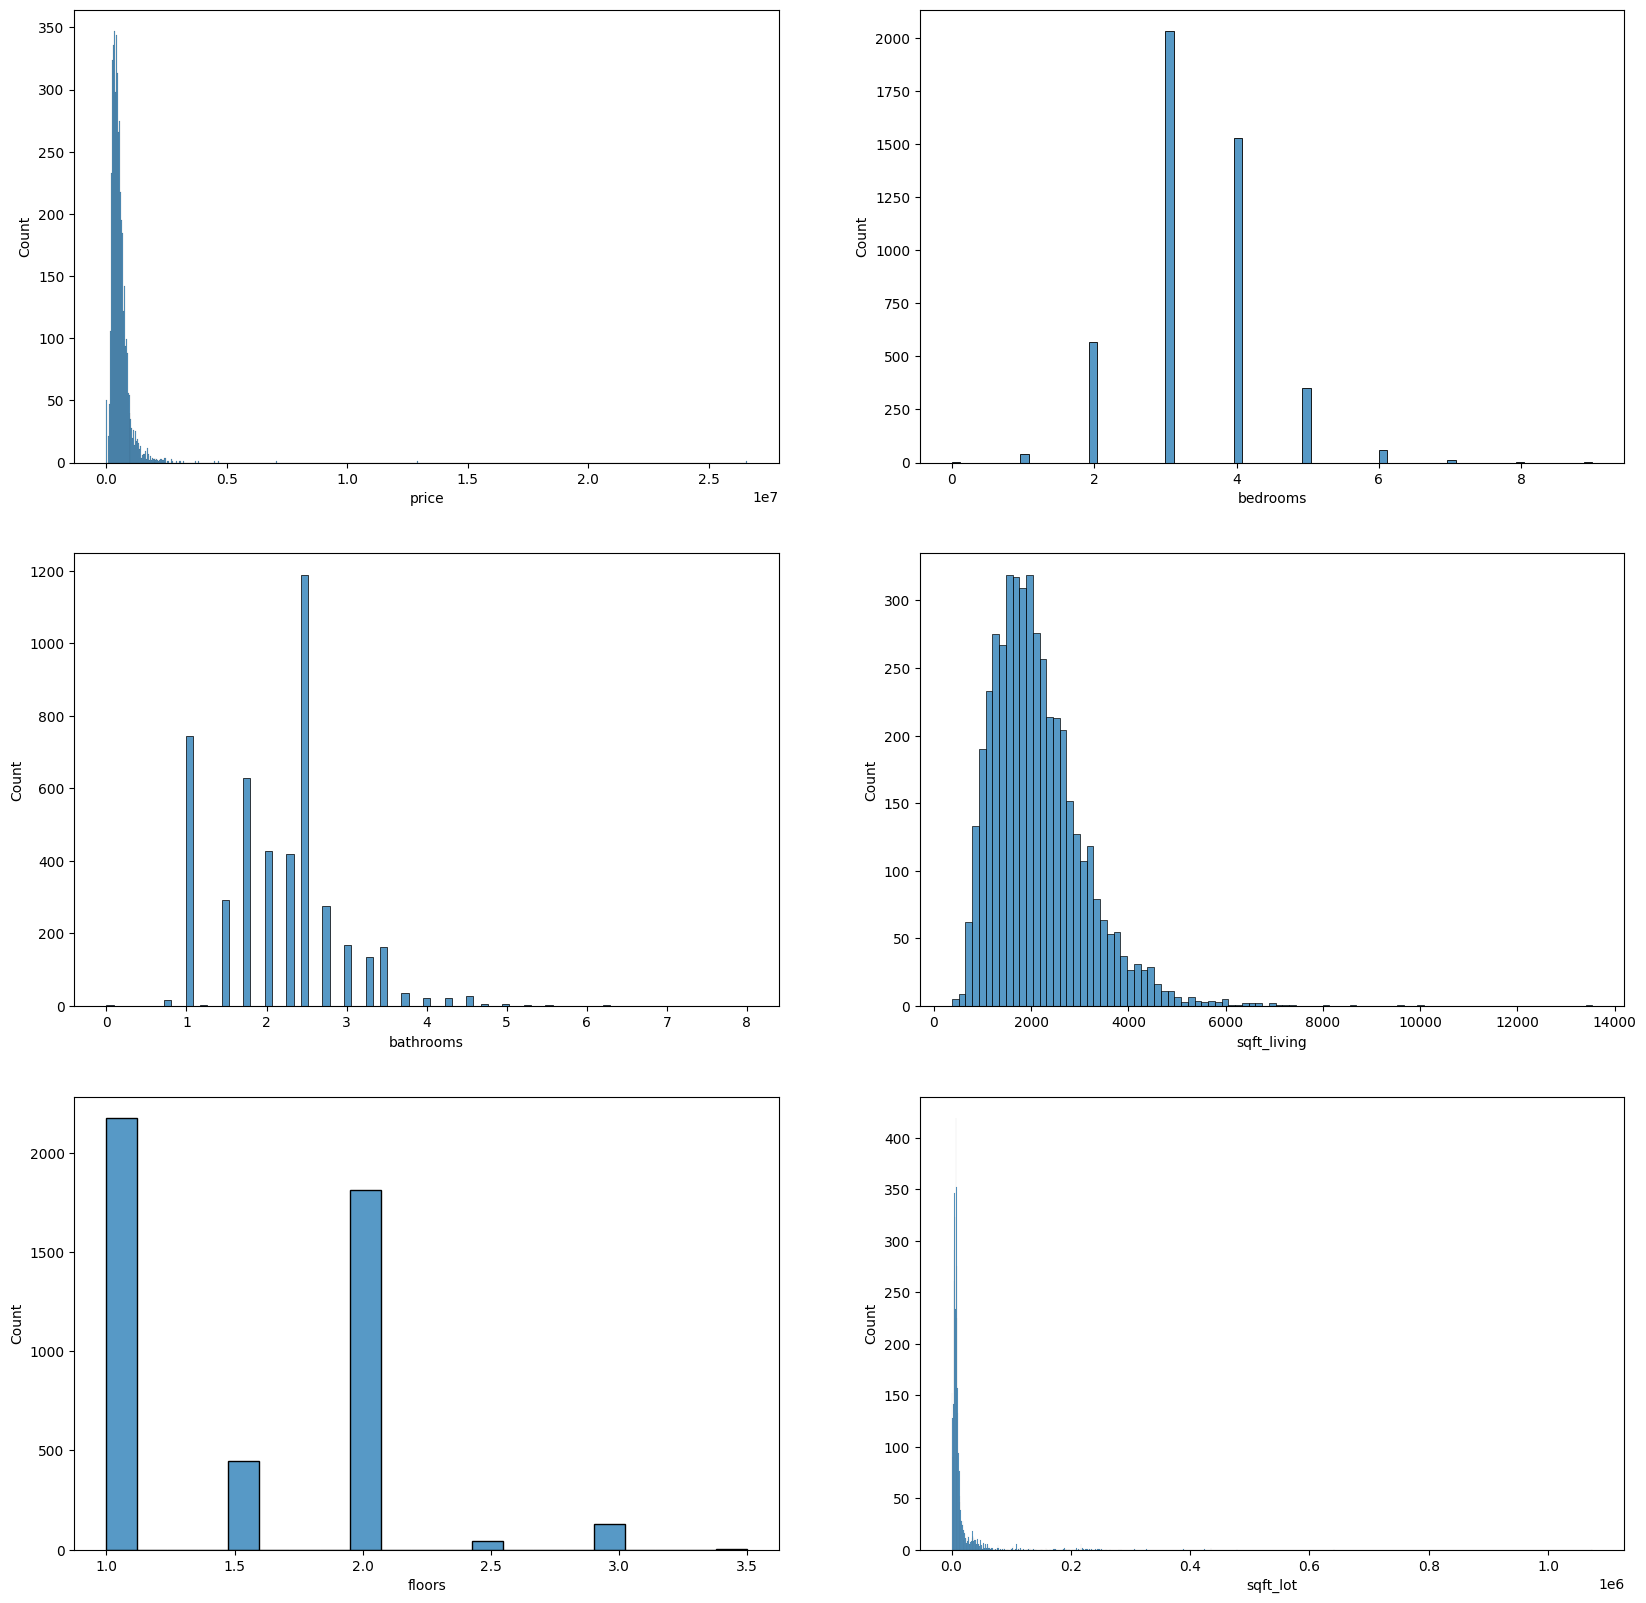

In [6]:
fig, axs = plt.subplots(3,2,figsize=(20, 20))
sns.histplot(data_domy['price'], ax=axs[0, 0]);
sns.histplot(data_domy['bedrooms'], ax=axs[0, 1]);
sns.histplot(data_domy['bathrooms'], ax=axs[1, 0]);
sns.histplot(data_domy['sqft_living'], ax=axs[1, 1]);
sns.histplot(data_domy['floors'], ax=axs[2, 0]);
sns.histplot(data_domy['sqft_lot'], ax=axs[2, 1]);

In [8]:
data_domy[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<Axes: >

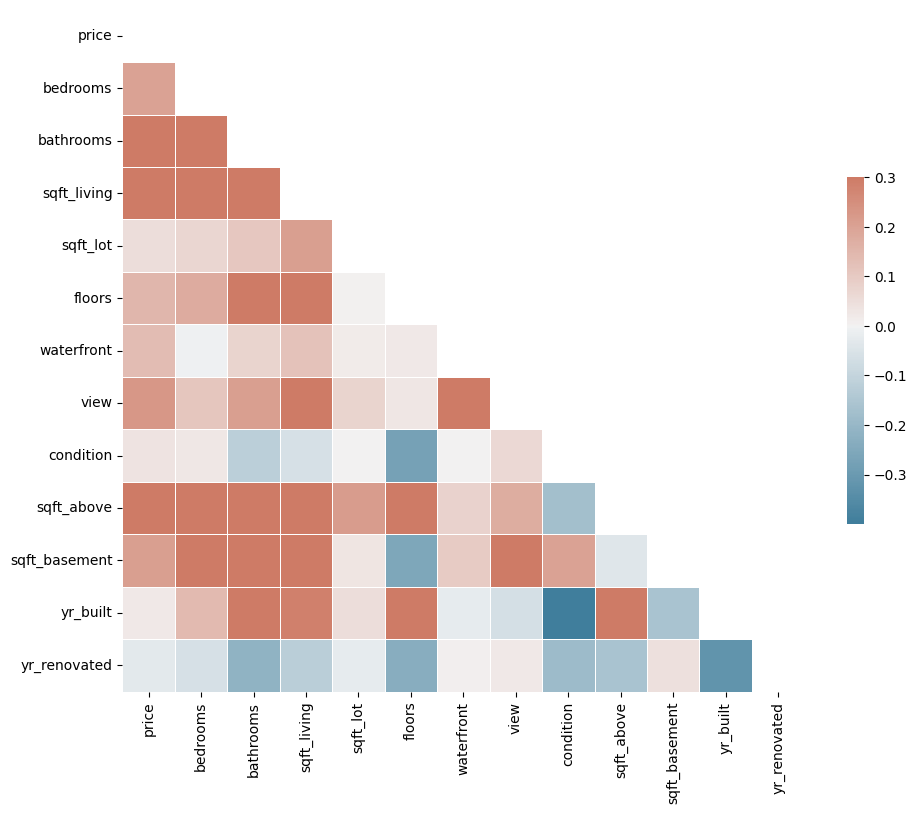

In [13]:
# macierz korelacji
clustHousePrice = data_domy.copy()
corr = data_domy[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#najwieksza korelacje z price maja: sqft_living, sqft_above, bathrooms, view

In [20]:
print("street:\n",data_domy["street"].value_counts())
print("*****************************************")
print("city:\n",data_domy["city"].value_counts())
# miasta jeszcze ma sens kodowac, bo się powtarzają, a ulice to tak średnio, więc ich nie dołącze do modelu

street:
 street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
2803 SW Bataan St        2
8354 11th Ave NW         2
6008 8th Ave NE          2
                        ..
25919 SE 37th Way        1
14435 SE 263rd St        1
2150 N 128th St          1
2043 NE 98th St          1
18923 SE 416th St        1
Name: count, Length: 4525, dtype: int64
*****************************************
city:
 city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake 

In [32]:
#kodowanie miast
data_domy = pd.get_dummies(data_domy, columns=["city"], drop_first=True)

KeyError: "None of [Index(['city'], dtype='object')] are in the [columns]"

In [34]:
city_columns = [col for col in data_domy.columns if "city_" in col]
data_domy[city_columns] = data_domy[city_columns].astype(int)

In [35]:
data_domy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912.0,1.5,0,0.0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,900000.0,5.0,2.50,3650,9050.0,2.0,0,0.1,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947.0,1.0,0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030.0,1.0,0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500.0,1.0,0,0.0,4,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='price'>

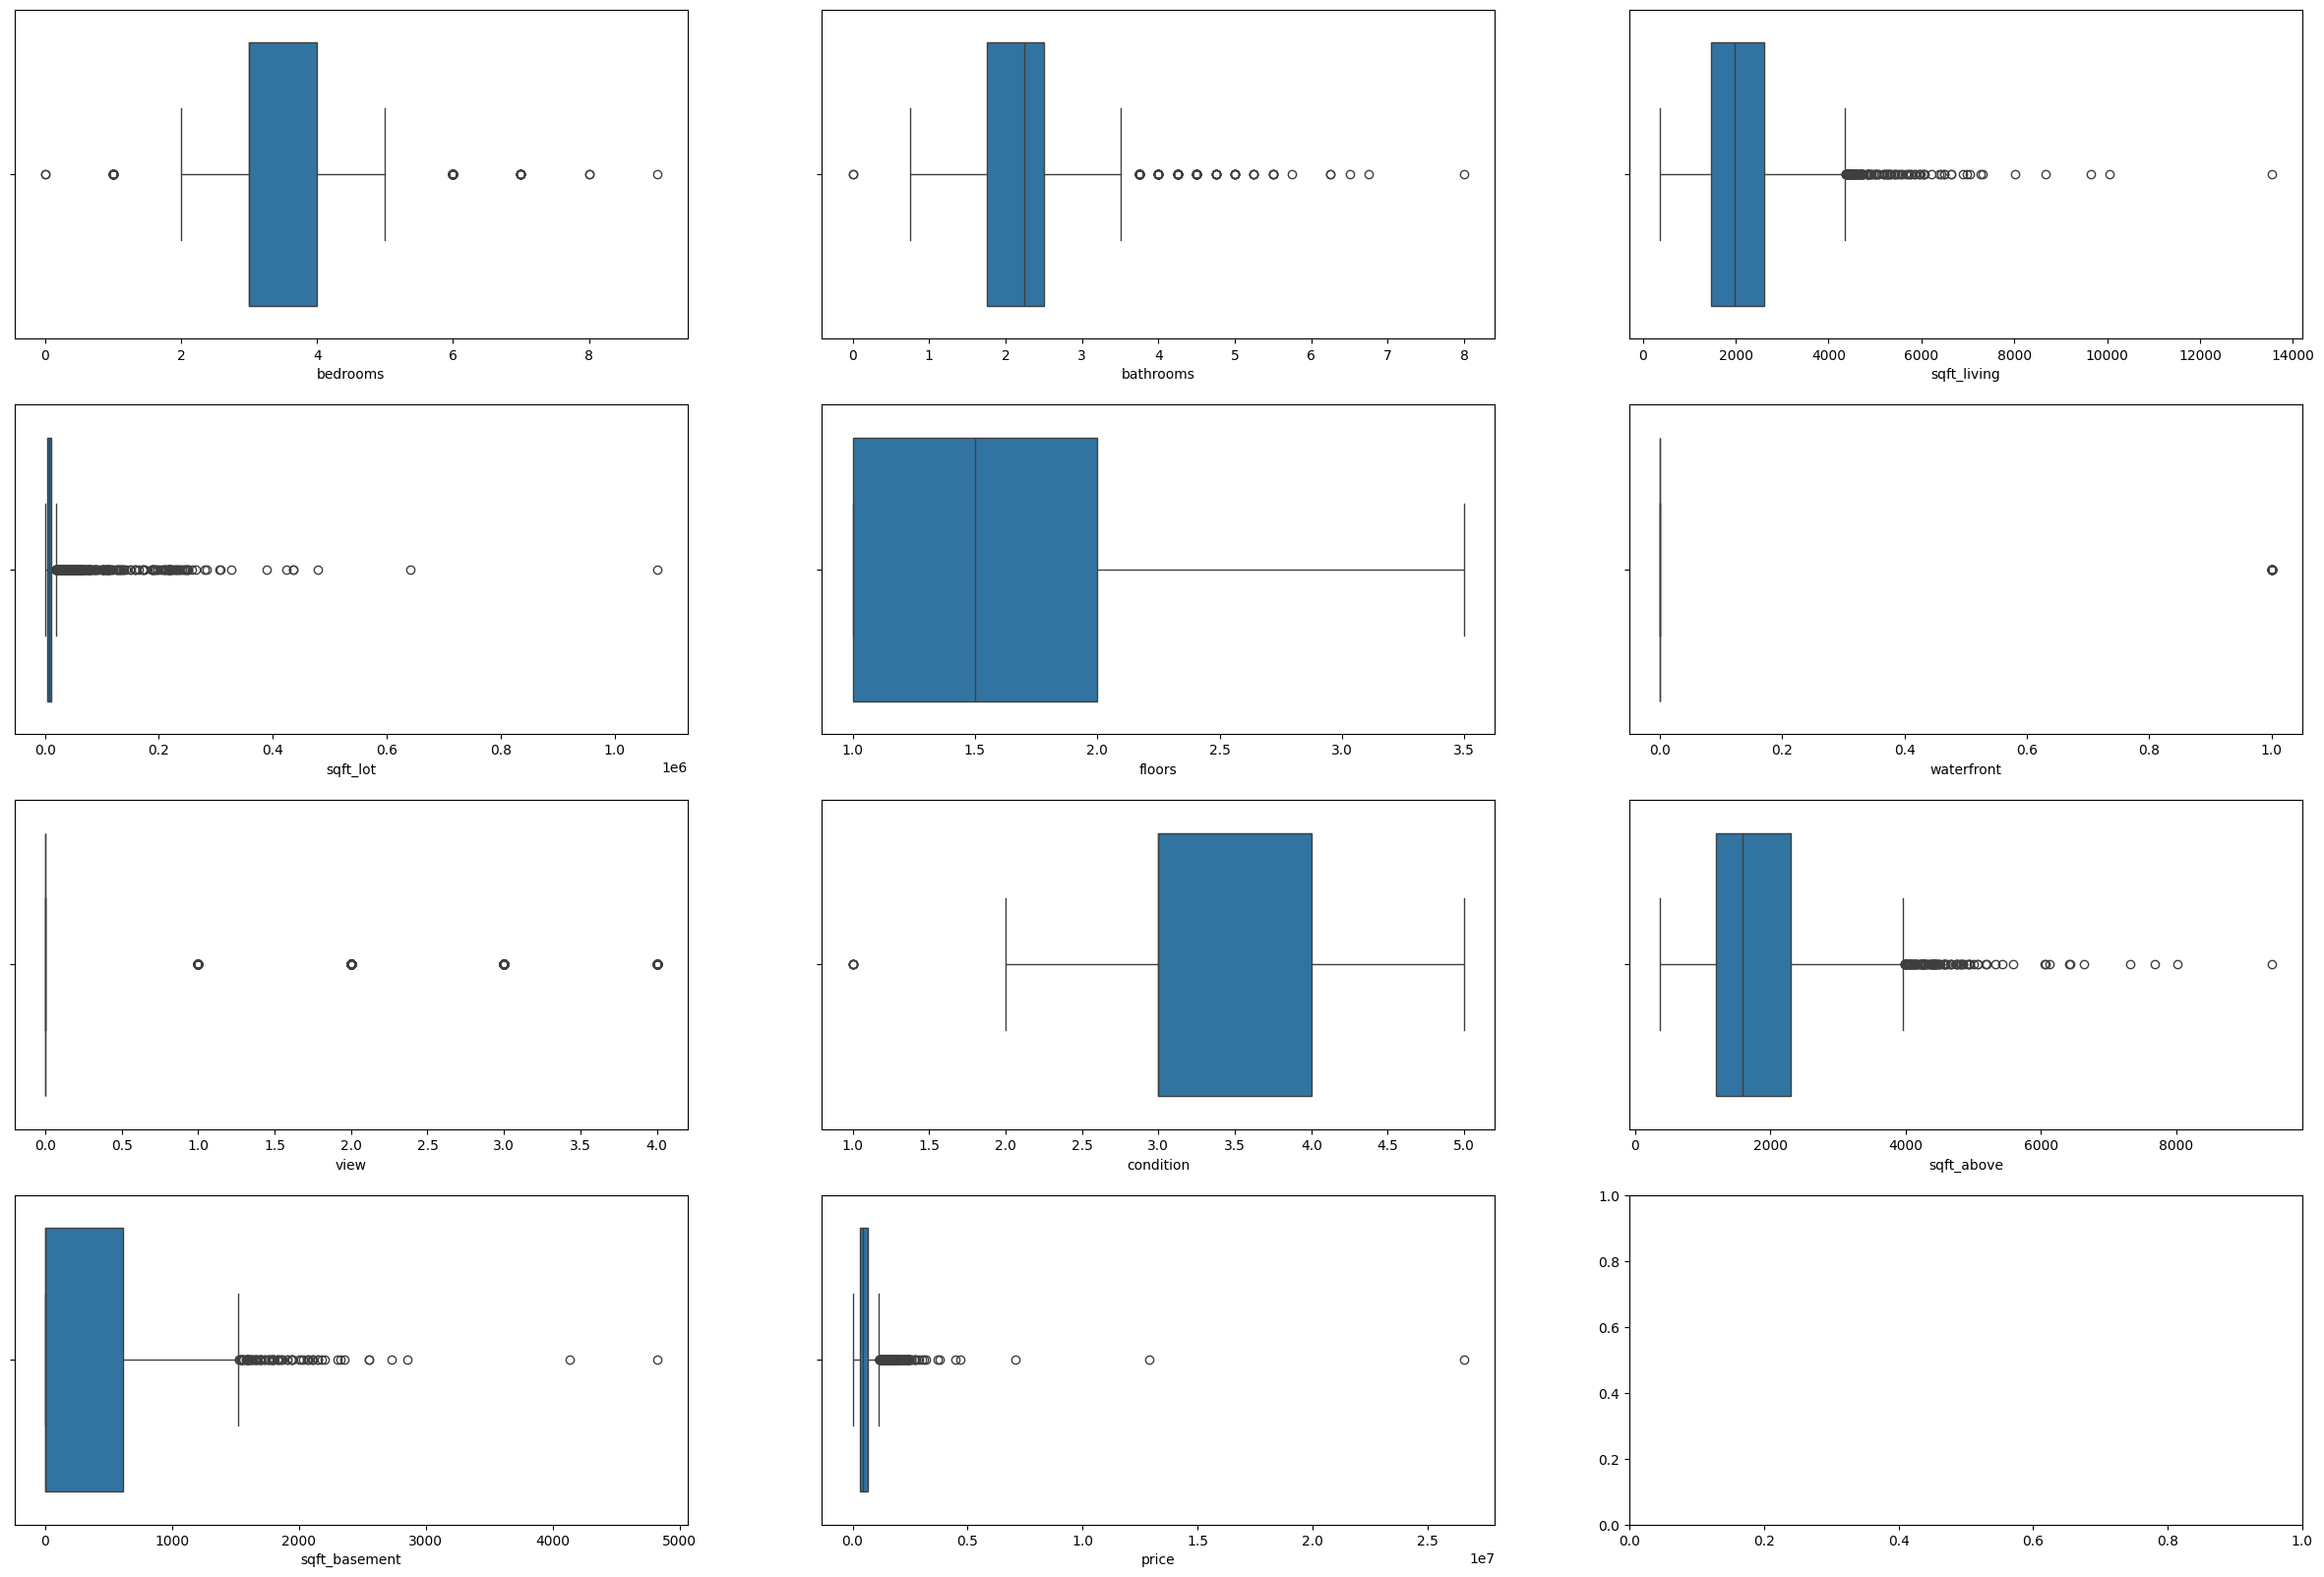

In [16]:
# szukanie outlierow
fig, axs = plt.subplots(4,3,figsize=(30, 20))
sns.boxplot(x=data_domy['bedrooms'], ax=axs[0, 0])
sns.boxplot(x=data_domy['bathrooms'], ax=axs[0, 1])
sns.boxplot(x=data_domy['sqft_living'], ax=axs[0, 2])
sns.boxplot(x=data_domy['sqft_lot'], ax=axs[1, 0])
sns.boxplot(x=data_domy['floors'], ax=axs[1, 1])
sns.boxplot(x=data_domy['waterfront'], ax=axs[1, 2])
sns.boxplot(x=data_domy['view'], ax=axs[2, 0])
sns.boxplot(x=data_domy['condition'], ax=axs[2, 1])
sns.boxplot(x=data_domy['sqft_above'], ax=axs[2, 2])
sns.boxplot(x=data_domy['sqft_basement'], ax=axs[3, 0])
sns.boxplot(x=data_domy['price'], ax=axs[3, 1])

In [17]:
# zamienianie outlierow
def replace_outliers(data_domy, column):
    Q1 = data_domy[column].quantile(0.25)
    Q3 = data_domy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean = data_domy[column].mean()
    lower = data_domy[column].quantile(0.10)
    higher = data_domy[column].quantile(0.90)
    data_domy.loc[(data_domy[column] < lower_bound), column] = lower
    data_domy.loc[(data_domy[column] > upper_bound), column] = higher
    return data_domy

columns_to_clean = ["sqft_living", "bathrooms", "sqft_above", "sqft_lot", "sqft_basement", "view", "price", "condition", "bedrooms"]

for col in columns_to_clean:
    data_domy = replace_outliers(data_domy, col)
    print(f"Zastąpiono wartości odstające w kolumnie {col} medianą")


Zastąpiono wartości odstające w kolumnie sqft_living medianą
Zastąpiono wartości odstające w kolumnie bathrooms medianą
Zastąpiono wartości odstające w kolumnie sqft_above medianą
Zastąpiono wartości odstające w kolumnie sqft_lot medianą
Zastąpiono wartości odstające w kolumnie sqft_basement medianą
Zastąpiono wartości odstające w kolumnie view medianą
Zastąpiono wartości odstające w kolumnie price medianą
Zastąpiono wartości odstające w kolumnie condition medianą
Zastąpiono wartości odstające w kolumnie bedrooms medianą


<ipython-input-17-2bc6443f7cc6>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24301.800000000007' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_domy.loc[(data_domy[column] > upper_bound), column] = higher
<ipython-input-17-2bc6443f7cc6>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1000000000003638' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_domy.loc[(data_domy[column] > upper_bound), column] = higher


<Axes: xlabel='price'>

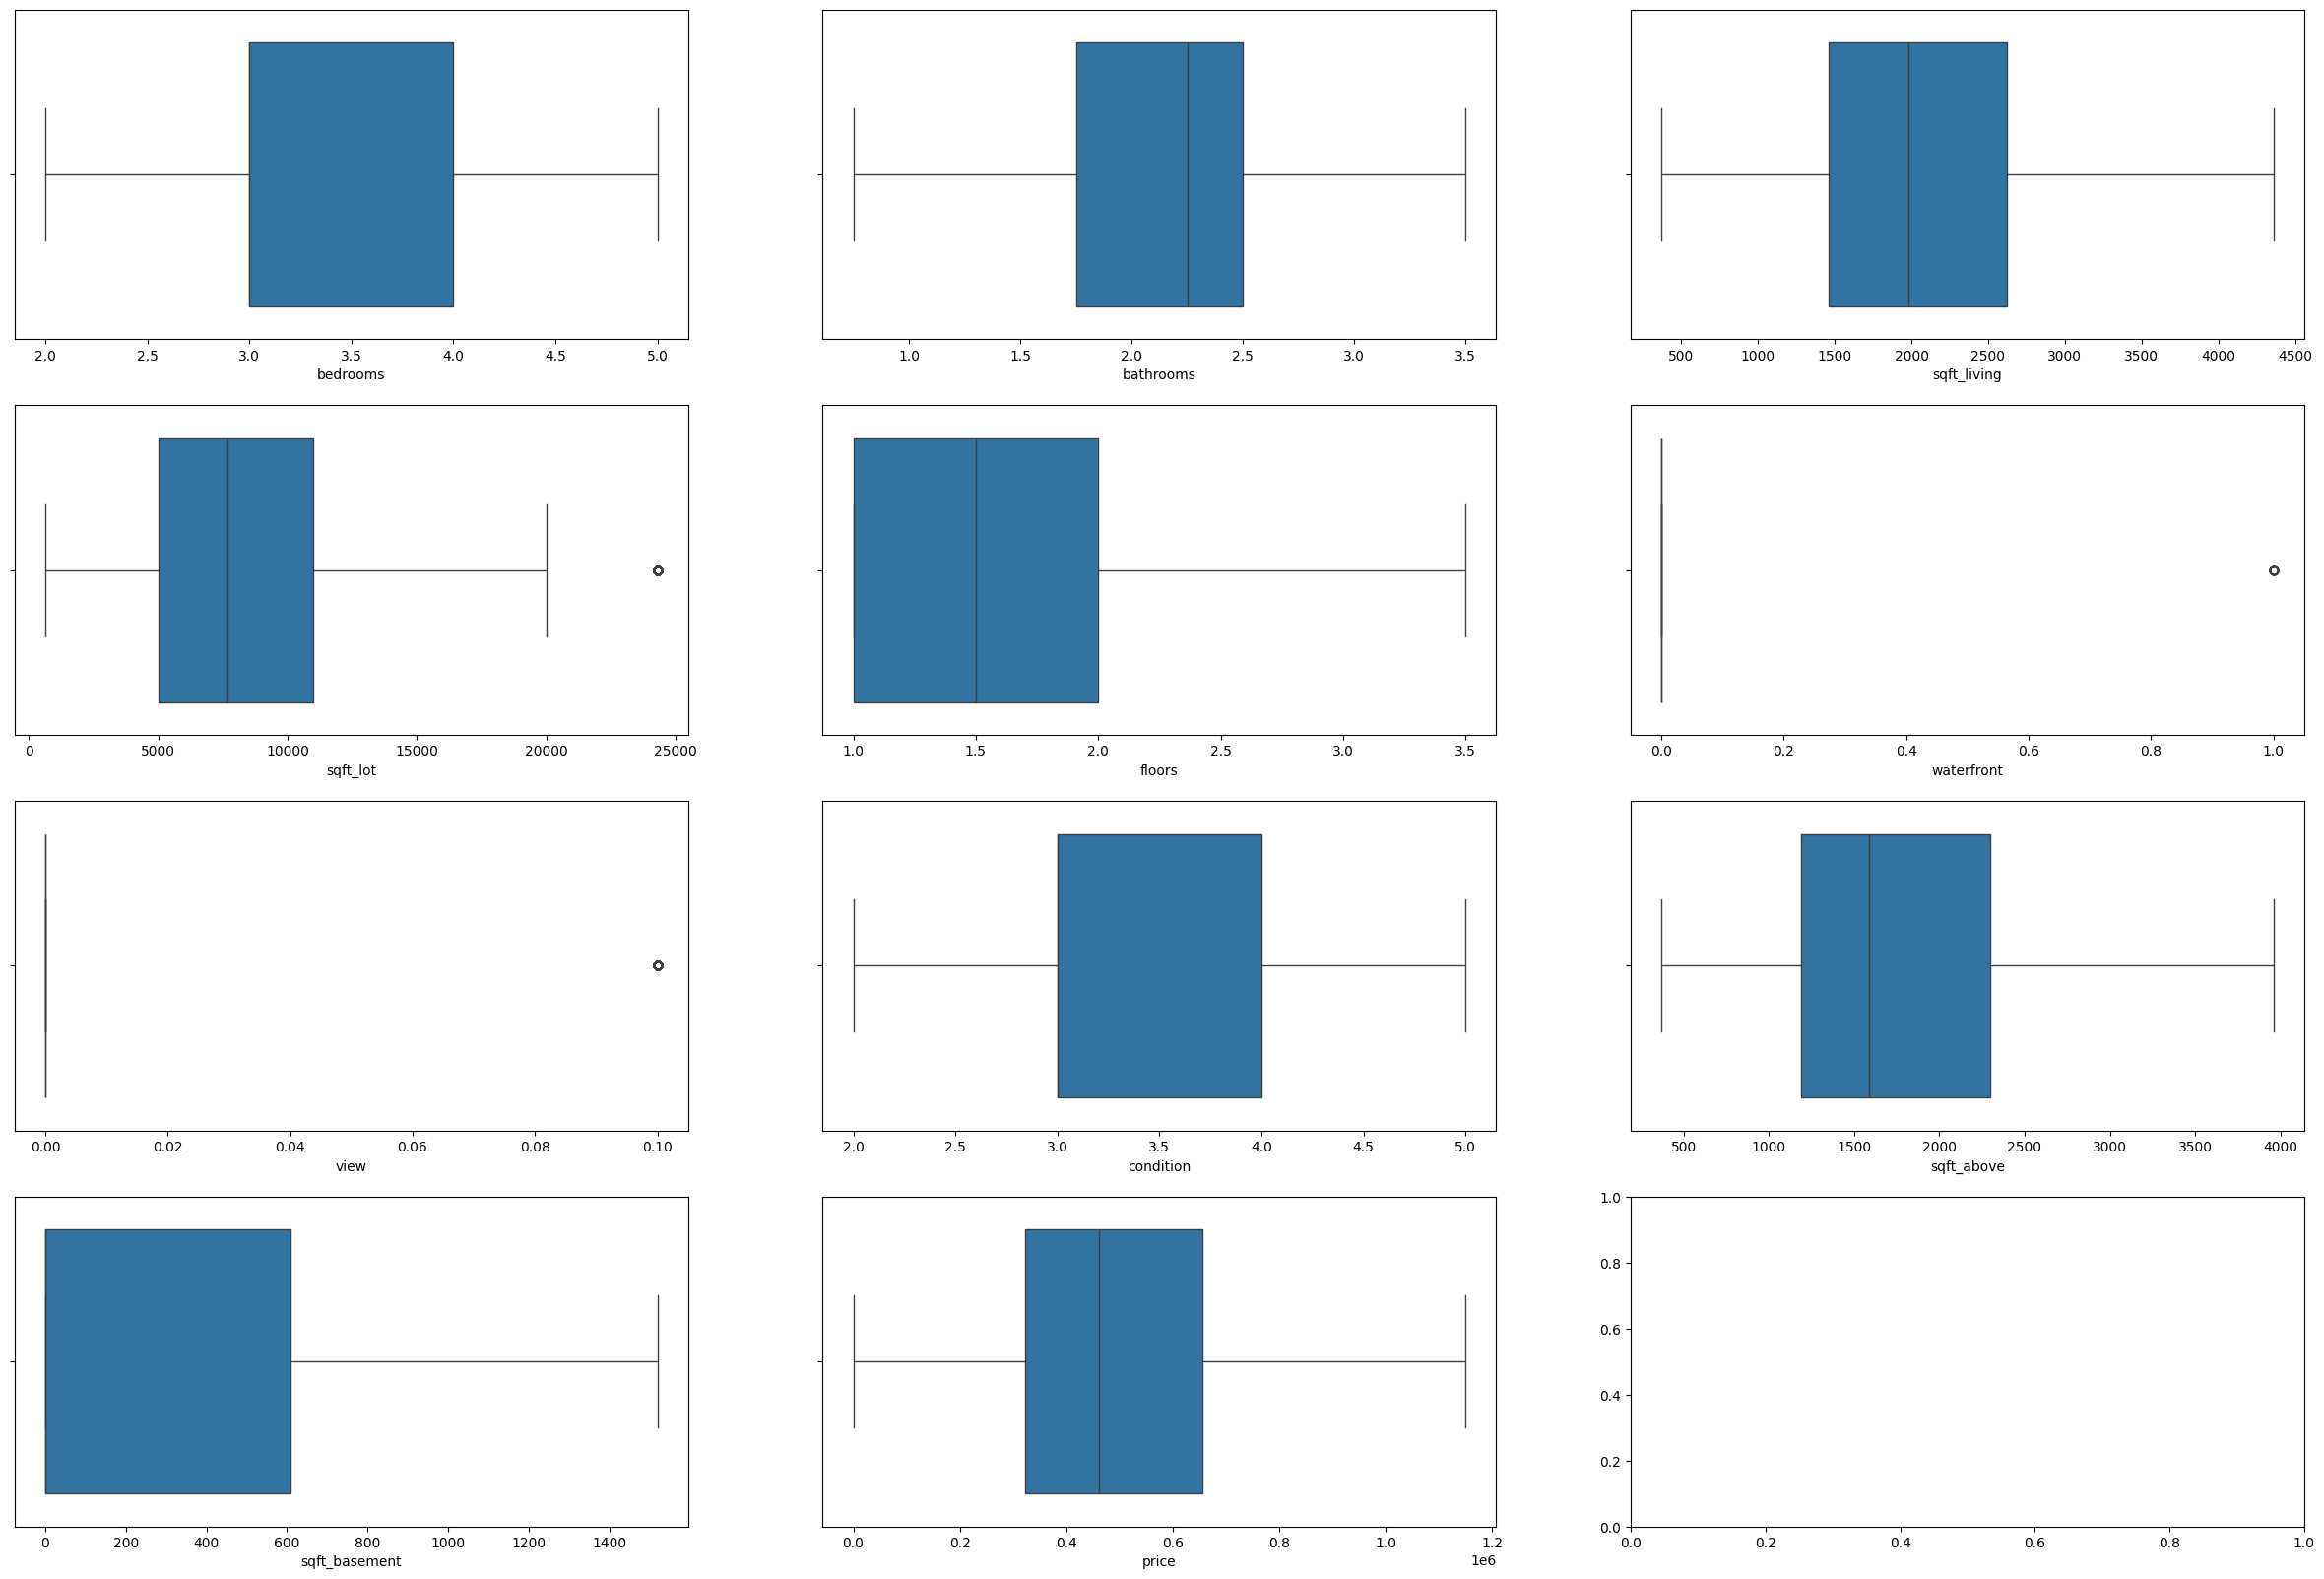

In [24]:
fig, axs = plt.subplots(4,3,figsize=(30, 20))
sns.boxplot(x=data_domy['bedrooms'], ax=axs[0, 0])
sns.boxplot(x=data_domy['bathrooms'], ax=axs[0, 1])
sns.boxplot(x=data_domy['sqft_living'], ax=axs[0, 2])
sns.boxplot(x=data_domy['sqft_lot'], ax=axs[1, 0])
sns.boxplot(x=data_domy['floors'], ax=axs[1, 1])
sns.boxplot(x=data_domy['waterfront'], ax=axs[1, 2])
sns.boxplot(x=data_domy['view'], ax=axs[2, 0])
sns.boxplot(x=data_domy['condition'], ax=axs[2, 1])
sns.boxplot(x=data_domy['sqft_above'], ax=axs[2, 2])
sns.boxplot(x=data_domy['sqft_basement'], ax=axs[3, 0])
sns.boxplot(x=data_domy['price'], ax=axs[3, 1])
# widać że zastąpiono outliery

2. Trenowanie i testowanie modelu

In [27]:
X = data_domy.drop(['price', 'date', 'street', 'statezip', 'country'], axis=1).copy()
y = data_domy['price'].copy()
# Pominęłam 5 kolumn:
# date - data wpisania ogłoszenia, powtarza sie, nie jest istotna,
# street - nie powtarzają się na tyle aby być istotnym faktorem w tym data secie
# statezip - nic nie wnosi
# country - wszedzie jest USA więc nic nie wnosi do modelu

# podział na trenowanie i testowanie modelu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Standaryzacja danych
# Skalowanie danych, aby zmienne typu sqft_living - które mają duże wartości, pasowały do np. bathrooms które zawierają się w przedziale 0-8
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Model regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

3. Predykcja

In [38]:
y_pred = model.predict(X_test)

4. Metryka dopasowania modelu

In [39]:
# Współczynniki regresji
print("Coefficients: ", model.coef_)
# Błąd średniokwadratowy
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Współczynnik determinacji R²
print("R squared: %.2f" % r2_score(y_test, y_pred))

Coefficients:  [-1.90235983e+04  2.43312824e+04  9.99804413e+04  2.11217255e+03
  1.09768528e+04  3.25734454e+03  2.13898185e+04  1.84904486e+04
  4.07773890e+04 -4.65938774e+03 -2.36546745e+04 -4.50899947e+02
 -5.68411381e+03 -3.34694050e-10  6.83556741e+04  4.75280370e+03
  7.90547489e+03  6.28254202e+03  1.61691420e+03  1.21886261e+04
 -3.44363216e+03 -7.39110088e+02  4.96396212e+03 -4.48293032e+03
  9.81806749e+03 -7.00293322e+03 -1.27329258e-11  3.55649253e+04
  1.33082798e+04 -6.46688474e+03  4.74715485e+04  6.76992148e+03
 -1.55560286e+03  1.23163912e+04  3.61464069e+04  1.79179664e+03
  1.64962013e+04  7.36380169e+03  5.44191169e+03 -1.02057932e+03
  1.60257520e+03  1.50328115e+03  5.55294283e+04  6.67392468e+03
  3.71957276e+04 -7.03573351e+02  1.00083280e+05  1.74996967e+04
 -4.94074632e+02  8.39454677e+03  3.26698888e+03 -3.02181099e+03
  7.81703813e+03  2.66674151e+04 -6.24644303e+02]
Mean squared error: 20752855314.28
R squared: 0.61


5. Wizualizacja

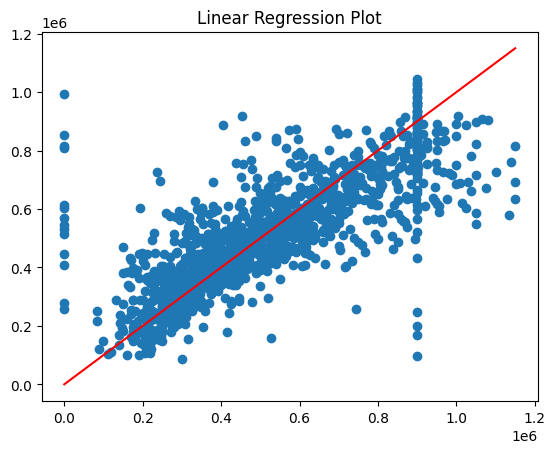

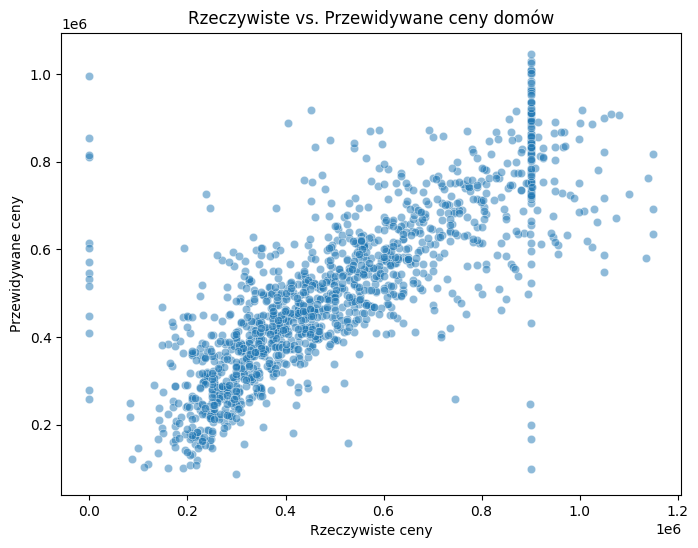

In [47]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression Plot")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Rzeczywiste ceny")
plt.ylabel("Przewidywane ceny")
plt.title("Rzeczywiste vs. Przewidywane ceny domów")
plt.show()